import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import seaborn as sns

# Paris trees : Analyse exploratoire du jeu de données

In [2]:
CSV_PATH = 'csv/p2-arbres-fr.csv'
data = pd.read_csv(CSV_PATH, sep=';')

## Aperçu du jeu de données :

In [5]:
data.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


## Représentation graphique du jeu de données :

<Axes: >

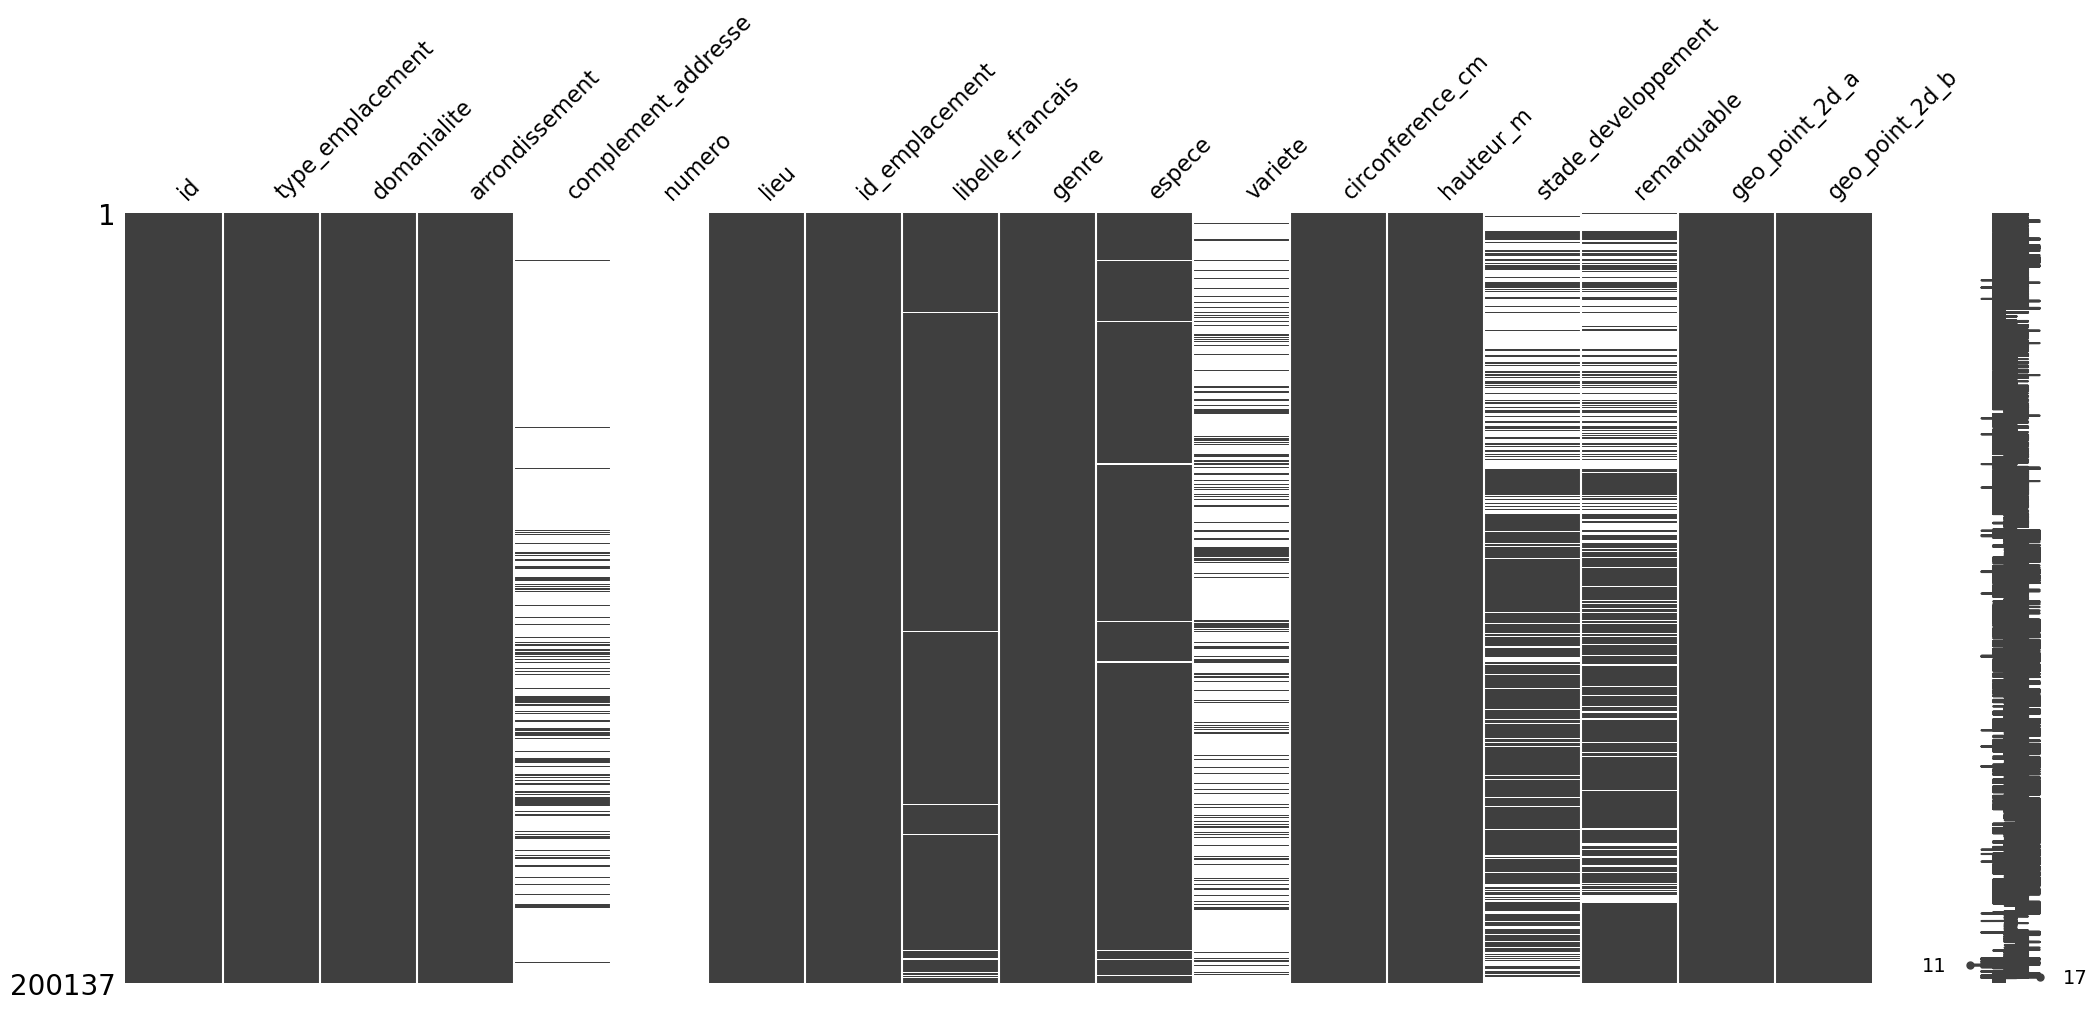

In [7]:
msno.matrix(data)

### - Infos générales

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

### - Description des données :

- Données qualitatives

In [27]:
quali = data.select_dtypes(include='object').columns
ordinal = []
nominal = []
for i in quali:
    if i == 'stade_developpement':
        ordinal.append(i)
    else:
        nominal.append(i)

print("Données qualitatives ordinales: ")
for i in ordinal:
    print(f"- {i}")
print("\n")
print("Données qualitatives nominales: ")
for i in nominal:
    print(f"- {i}")

Données qualitatives ordinales: 
- stade_developpement


Données qualitatives nominales: 
- type_emplacement
- domanialite
- arrondissement
- complement_addresse
- lieu
- id_emplacement
- libelle_francais
- genre
- espece
- variete


- Données quantitatives :

In [29]:
quanti = data.select_dtypes(include='number').columns
discrete = []
continuous = []
for i in quanti:
    if type(data[i][0]) == np.int64:
        discrete.append(i)
    else:
        continuous.append(i)


print("Données quantitatives discrètes: ")
for i in discrete:
    print(f"- {i}")
print("\n")
print("Données quantitatives continues: ")
for i in continuous:
    print(f"- {i}")

Données quantitatives discrètes: 
- id
- circonference_cm
- hauteur_m


Données quantitatives continues: 
- numero
- remarquable
- geo_point_2d_a
- geo_point_2d_b


- description des valeurs nulles / non-nulles :

In [9]:
isNull = data.isnull().sum()
totalNotNull = data.notnull().sum().sum()
totalNull = data.isnull().sum().sum()
totalValues = totalNotNull + totalNull

print('Nombre total de valeurs:', totalValues)
print('Nombre total de valeurs non nulles:', totalNotNull)
print('Nombre total de valeurs nulles:', totalNull)
print(f'Pourcentage de valeurs nulles: {round((totalNull/totalValues)*100, 2)}%')

Nombre total de valeurs: 3602466
Nombre total de valeurs non nulles: 2936165
Nombre total de valeurs nulles: 666301
Pourcentage de valeurs nulles: 18.5%


### Visualisation des données manquantes en pourcentage pour chacune des colonnes concernnées :

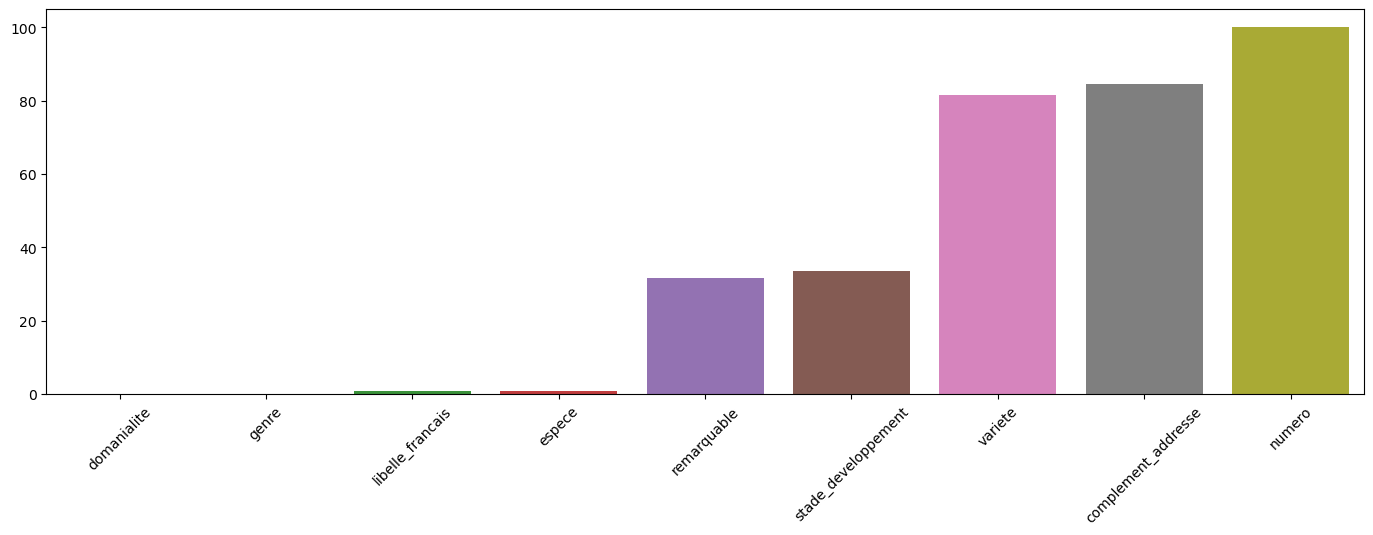

In [16]:
missing = data.isnull().sum()
missing = missing[missing > 0]
missing = missing / data.shape[0] * 100
missing = missing.sort_values()
plt.figure(figsize=(17, 5))
sns.barplot(x=missing.index, y=missing)
plt.xticks(rotation=45)
plt.show()

### Description du jeu de données :

In [17]:
data.describe()

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,0.0,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,3.872027e+05,NaN,83.380479,13.110509,0.001343,48.854491,2.348208
std,5.456032e+05,NaN,673.190213,1971.217387,0.036618,0.030234,0.051220
min,9.987400e+04,NaN,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.559270e+05,NaN,30.000000,5.000000,0.000000,48.835021,2.307530
50%,2.210780e+05,NaN,70.000000,8.000000,0.000000,48.854162,2.351095
75%,2.741020e+05,NaN,115.000000,12.000000,0.000000,48.876447,2.386838
max,2.024745e+06,NaN,250255.000000,881818.000000,1.000000,48.911485,2.469759


### visualisation des données abérrantes :

- Boxplot répartition de la circonférence des arbres (en cm)

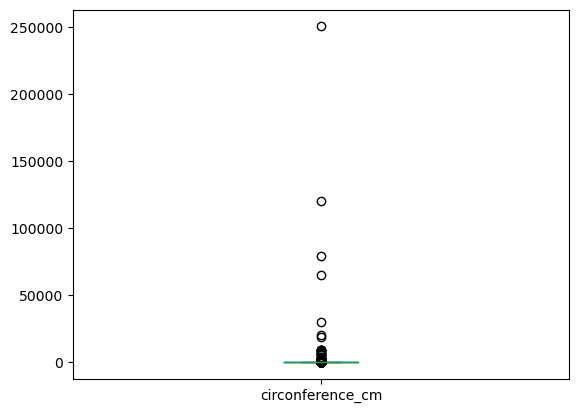

In [23]:
data['circonference_cm'].plot(kind='box')
plt.show()

- Boxplot: répartition de la hauteur des arbres (en m)

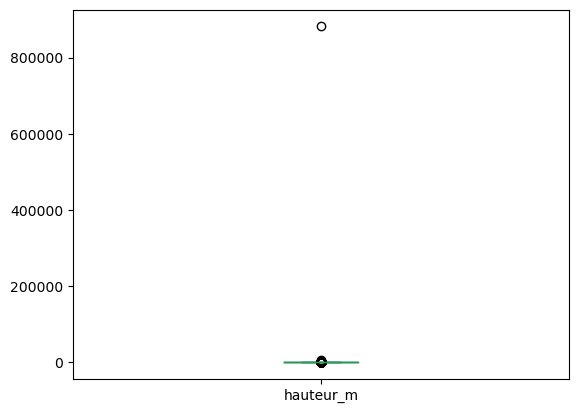

In [24]:
data['hauteur_m'].plot(kind='box')
plt.show()